<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive. before uploading to Github only enable directory = "" and silence the rest.


In [1]:
directory = ""
# from google.colab import drive
# drive.mount("/drive")
# directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: importante!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
#!pip install matplotlib==3.3.4
#!pip freeze 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#other important requirements

In [3]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
ordenado

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [4]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
NaN,11620000,2927000,2029000,3370000,538000,902000,637000,583000,480000,154000


# CASOS

Casos diarios y acumulados

In [5]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios.index[-1]

Timestamp('2021-08-26 00:00:00')

In [6]:
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,1,0,0,1,0,0,0,0,0,0
2020-03-12,1,0,0,1,0,0,0,0,0,0
2020-03-13,8,0,1,1,6,0,0,0,0,0
2020-03-14,8,0,1,1,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,486642,99716,73283,169664,23892,23114,32014,37727,20392,6840
2021-08-23,487130,99754,73377,169840,23892,23153,32059,37816,20394,6845
2021-08-24,487720,99818,73491,170067,23908,23194,32104,37892,20399,6847
2021-08-25,488402,99948,73625,170269,23935,23232,32172,37963,20408,6850


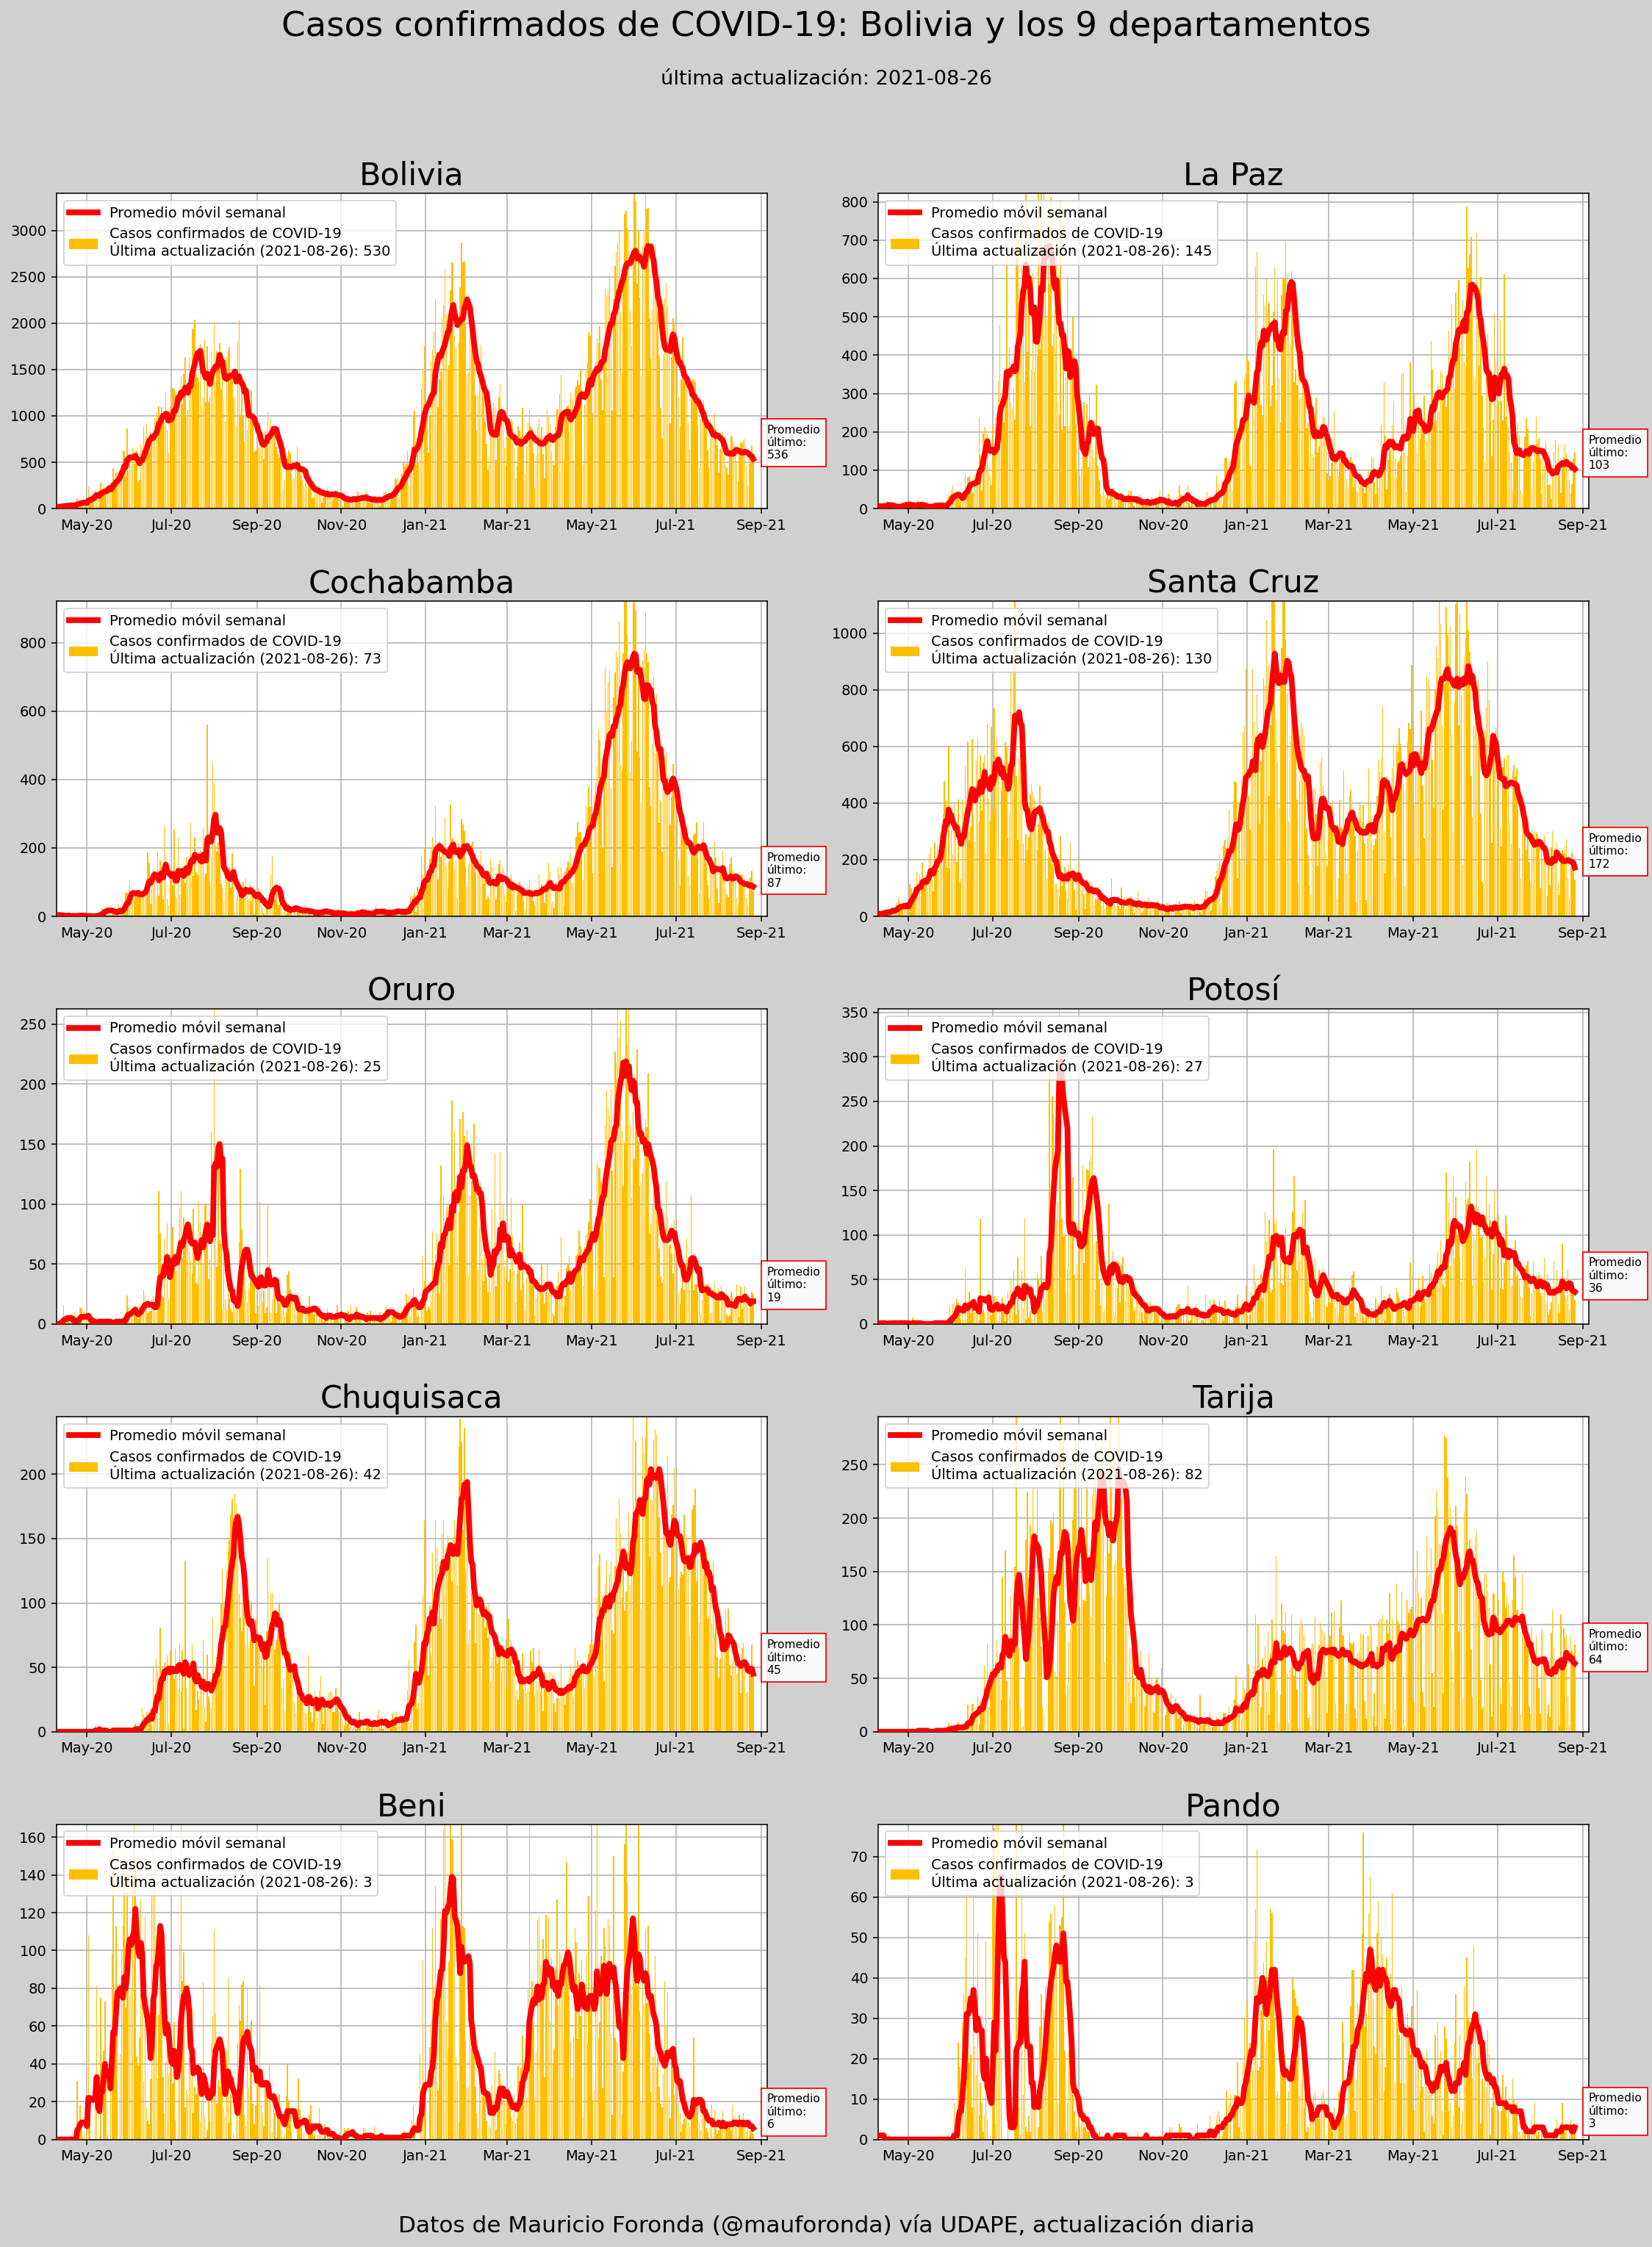

In [8]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140
                        )
axs = axs.flatten()

background_color1 = "#d0d0d0"
background_color2 = "w"
fig.set_facecolor(background_color1)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 9 departamentos", fontsize= 24, y=1.05)
fig.text(.5, 1.014, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left")
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )

  
fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

In [9]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [10]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,6,2,0,1,0,3,0,0,0,0
2021-08-23,11,1,0,1,1,0,1,6,1,0
2021-08-24,17,3,0,7,2,0,3,2,0,0
2021-08-25,20,5,2,7,0,0,3,3,0,0


In [11]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-08-22,16.7,4.0,2.3,4.0,1.1,1.1,1.7,2.1,0.0,0.3
2021-08-23,16.4,3.9,1.6,4.0,1.1,1.1,1.6,2.7,0.1,0.3
2021-08-24,15.4,3.6,1.0,4.1,1.4,1.0,1.3,2.7,0.1,0.1
2021-08-25,16.3,3.6,1.0,4.9,1.4,0.9,1.6,2.7,0.1,0.1
2021-08-26,16.4,3.9,1.1,5.0,1.0,0.6,1.9,2.9,0.1,0.0


In [12]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,16617,2535,2745,5744,1245,815,1347,973,890,323
2021-08-23,16628,2536,2745,5745,1246,815,1348,979,891,323
2021-08-24,16645,2539,2745,5752,1248,815,1351,981,891,323
2021-08-25,16665,2544,2747,5759,1248,815,1354,984,891,323


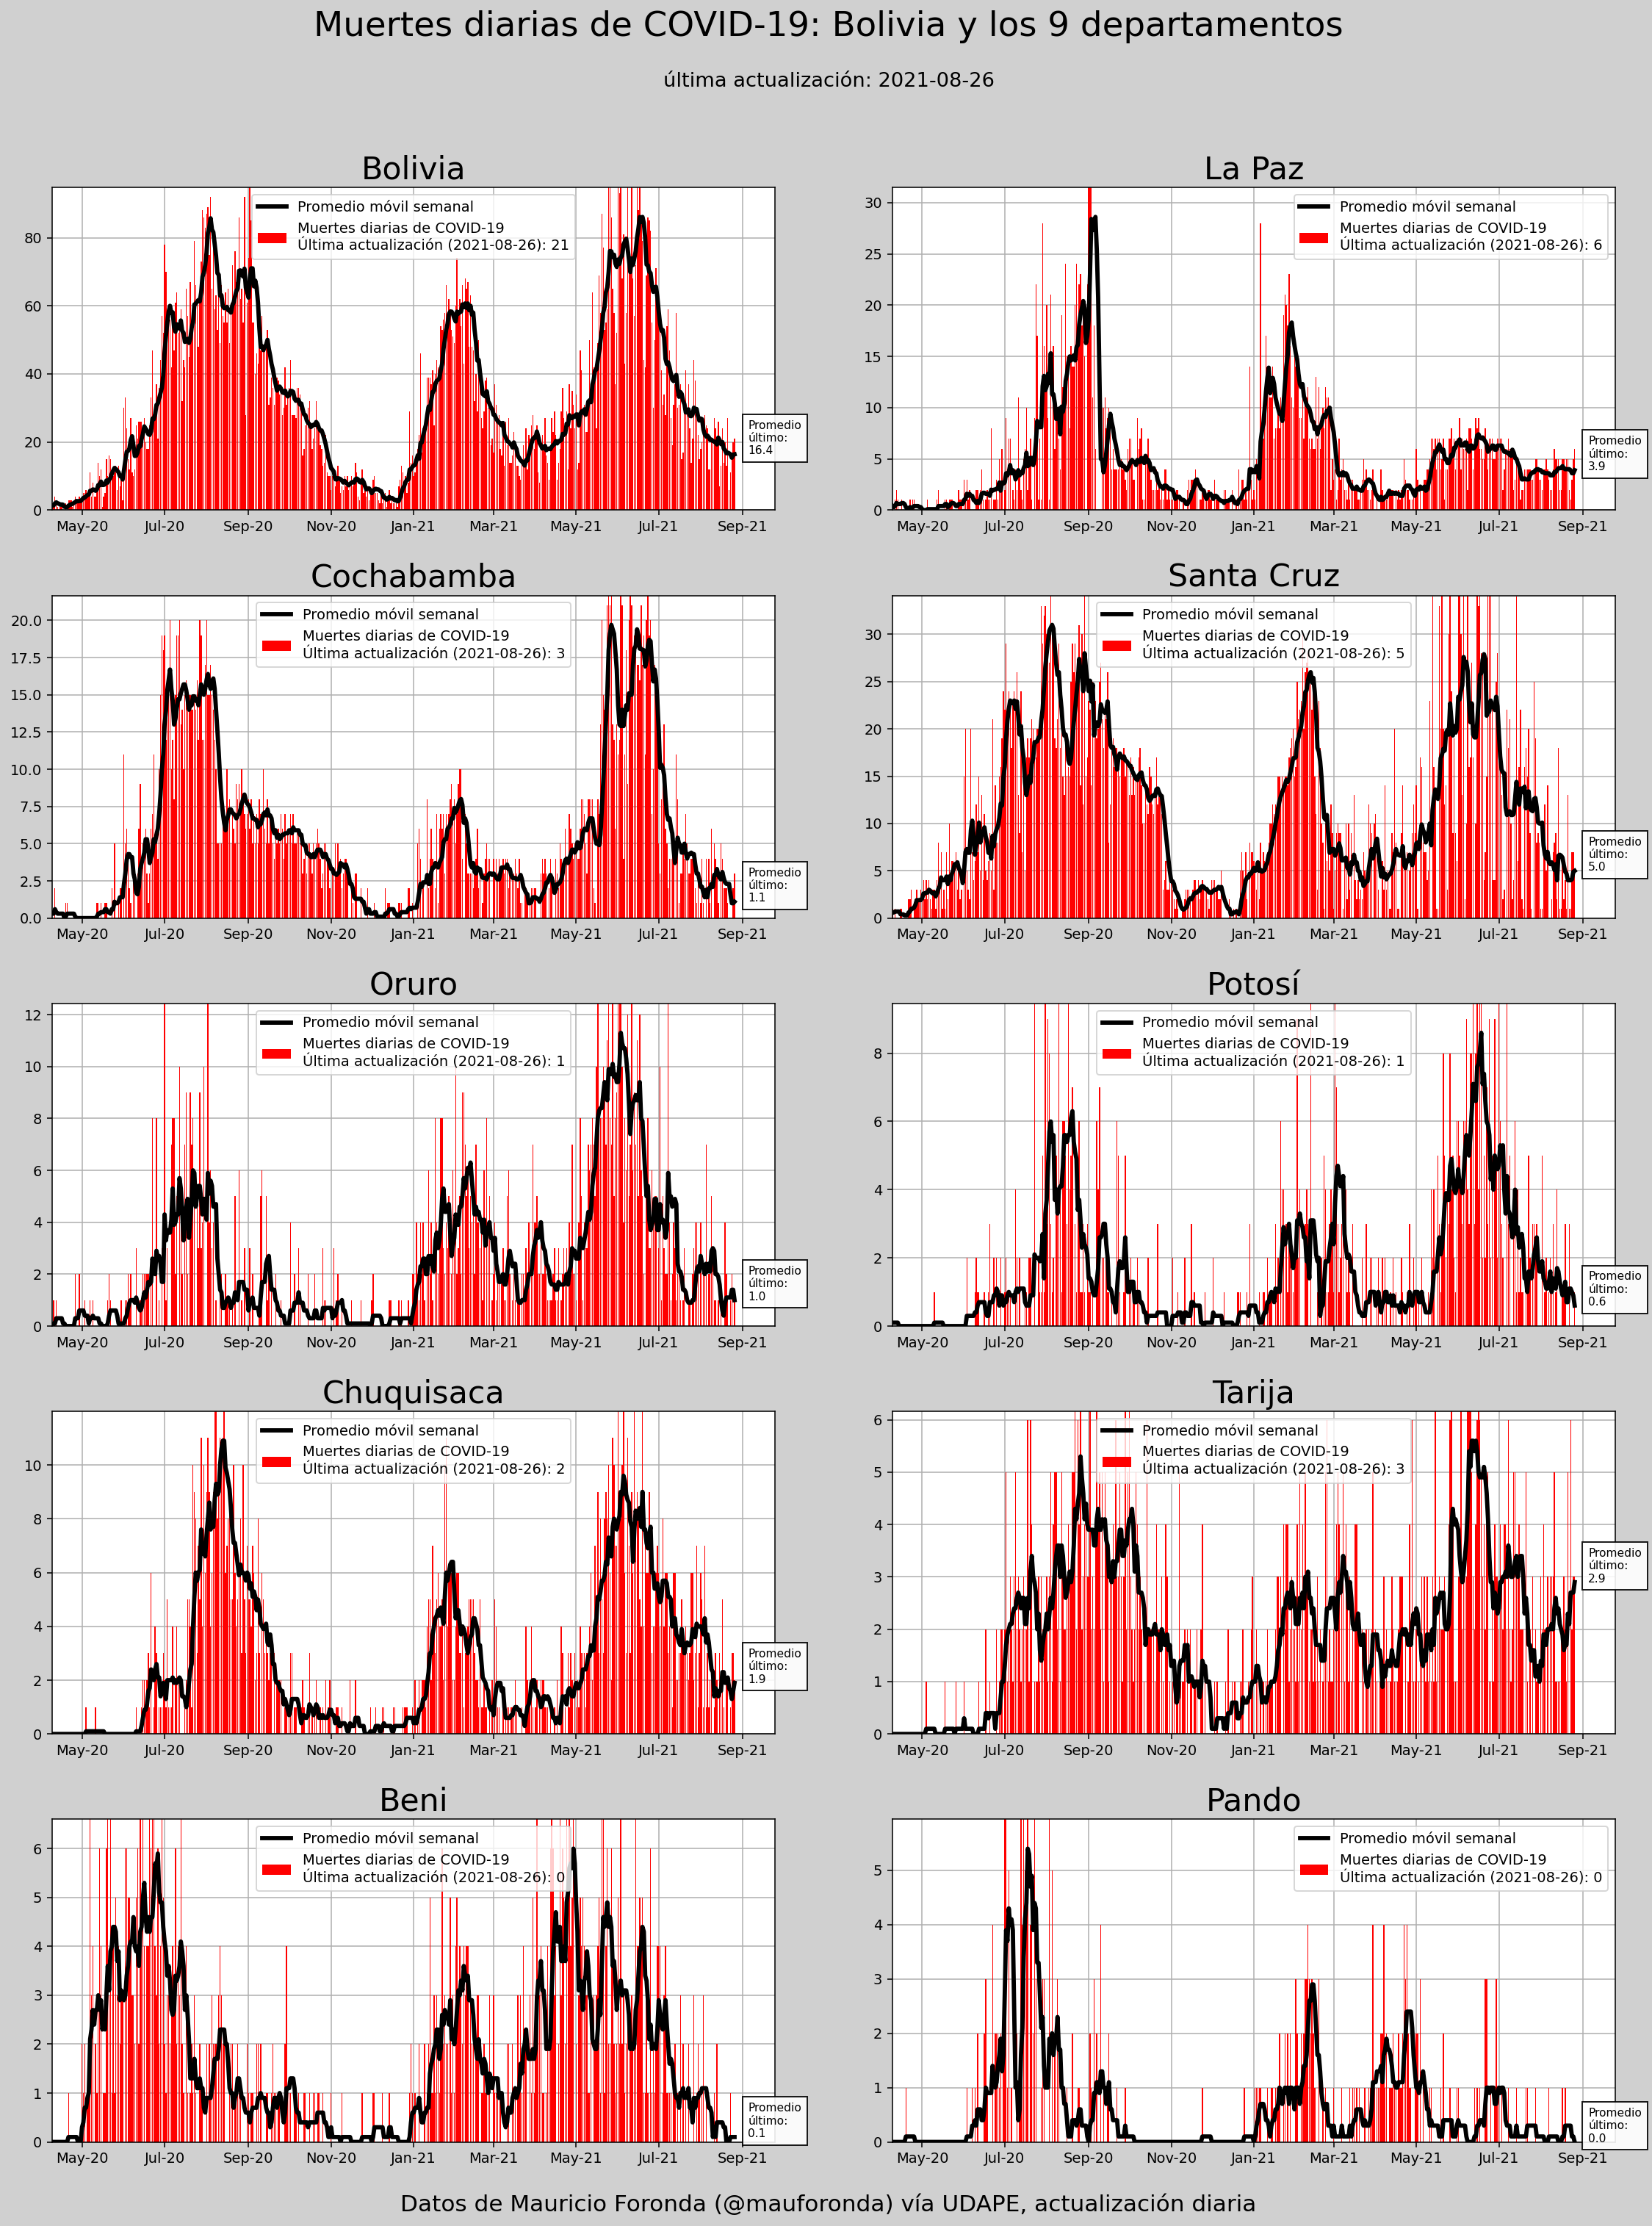

In [13]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)

axs = axs.flatten()


background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 24, y=1.05)
fig.text(0.5, 1.013,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=10), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

  #axs[i].text(muertes_diarias7.index[30], muertes_diarias7[muertes_diarias7.columns[i]].max()*1.12,"última actualización: {}".format(muertes_diarias7.index[-1].date()), fontsize=5)

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [14]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [15]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [16]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [17]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [18]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [19]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-08-22,2231235.0,452578.0,401318.0,874750.0,87647.0,79349.0,116692.0,120998.0,71618.0,26285.0
2021-08-23,2236997.0,453070.0,402724.0,877424.0,87720.0,79514.0,116937.0,121478.0,71804.0,26326.0
2021-08-24,2236997.0,453070.0,402724.0,877424.0,87720.0,79514.0,116937.0,121478.0,71804.0,26326.0
2021-08-25,2236997.0,453070.0,402724.0,877424.0,87720.0,79514.0,116937.0,121478.0,71804.0,26326.0
2021-08-26,2236997.0,453070.0,402724.0,877424.0,87720.0,79514.0,116937.0,121478.0,71804.0,26326.0


In [20]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2021-08-22,2408.0,766.0,441.0,614.0,180.0,35.0,247.0,80.0,41.0,4.0
2021-08-23,5762.0,492.0,1406.0,2674.0,73.0,165.0,245.0,480.0,186.0,41.0
2021-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,457.000000,128.000000,52.000000,157.000000,8.000000,14.000000,1.000000,13.000000,81.000000,3.000000
2020-05-09,537.750000,125.500000,49.000000,206.500000,8.000000,15.000000,14.500000,7.500000,45.000000,4.166667
2020-05-10,564.666667,107.333333,38.333333,253.333333,12.000000,19.666667,19.000000,7.500000,32.333333,4.555556
2020-05-11,578.125000,101.250000,31.000000,351.750000,12.250000,16.500000,17.000000,5.333333,45.250000,4.750000
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,6743.142857,1443.142857,1160.000000,2587.714286,313.000000,186.714286,316.714286,468.428571,228.714286,38.714286
2021-08-23,6619.857143,1431.857143,1149.428571,2552.142857,297.428571,189.571429,303.571429,458.857143,199.142857,37.857143
2021-08-24,6369.333333,1419.000000,1111.500000,2438.500000,285.166667,156.000000,309.000000,432.000000,184.500000,33.666667
2021-08-25,5954.200000,1324.600000,1063.000000,2296.200000,265.200000,133.200000,277.200000,398.400000,165.800000,30.600000


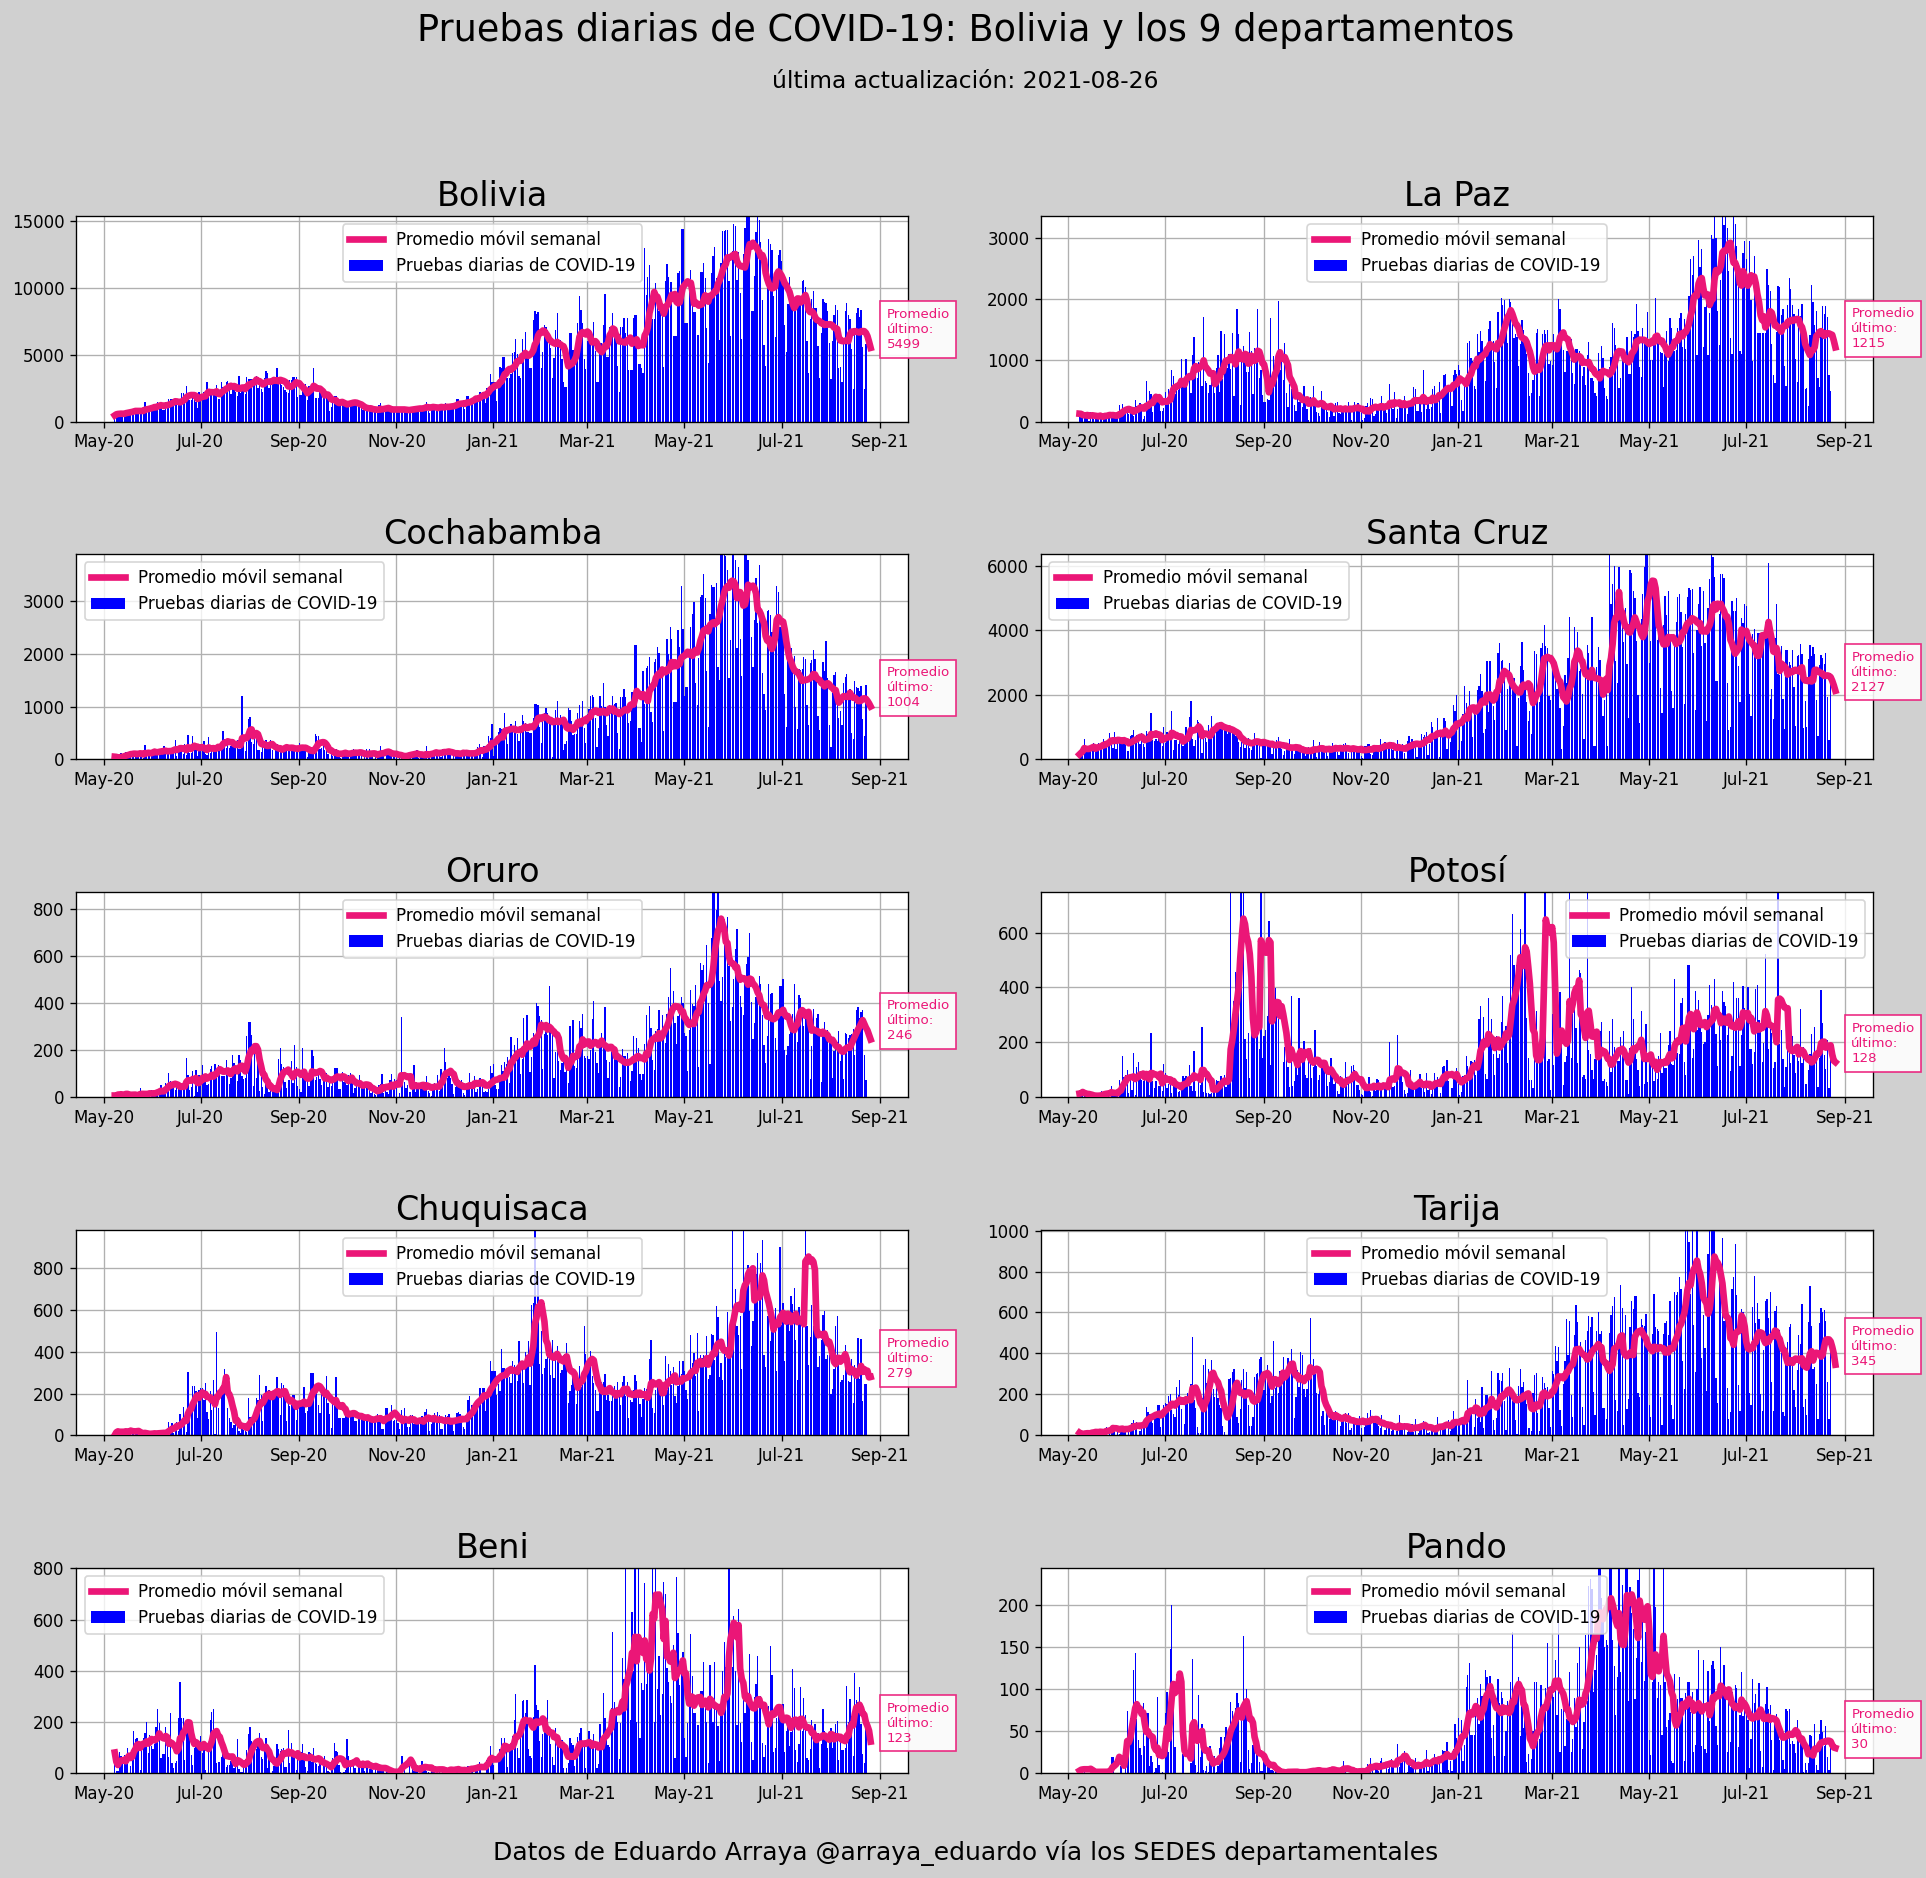

In [22]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.025,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14, ha="center")

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [23]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.404814,0.179688,0.153846,0.439490,0.125000,0.000000,0.000000,0.230769,1.000000,0.000000
2020-05-09,0.276475,0.056911,0.108696,0.585938,0.625000,0.000000,0.107143,0.500000,0.000000,0.000000
2020-05-10,0.192401,0.112676,0.529412,0.276657,0.150000,0.000000,0.035714,NaN,0.285714,0.000000
2020-05-11,0.444624,0.048193,0.555556,0.293663,0.000000,0.142857,0.000000,0.000000,0.892857,0.000000
2020-05-12,0.215036,0.029126,0.179487,0.392308,0.222222,0.000000,NaN,0.136364,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,0.103405,0.097911,0.077098,0.100977,0.077778,0.457143,0.125506,0.087500,0.219512,0.250000
2021-08-23,0.084693,0.077236,0.066856,0.065819,0.000000,0.236364,0.183673,0.185417,0.010753,0.121951
2021-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [25]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-05-08,0.404814,0.179688,0.153846,0.439490,0.125000,0.000000,0.000000,0.230769,1.000000,0.000000
2020-05-09,0.340645,0.118299,0.131271,0.512714,0.375000,0.000000,0.053571,0.365385,0.500000,0.000000
2020-05-10,0.291230,0.116425,0.263985,0.434028,0.300000,0.000000,0.047619,0.365385,0.428571,0.000000
2020-05-11,0.329579,0.099367,0.336877,0.398937,0.225000,0.035714,0.035714,0.243590,0.544643,0.000000
2020-05-12,0.306670,0.085319,0.305399,0.397611,0.224444,0.028571,0.035714,0.216783,0.435714,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,0.090586,0.080242,0.079605,0.078738,0.062190,0.277130,0.155948,0.142285,0.066009,0.092973
2021-08-23,0.089811,0.081018,0.077283,0.078024,0.057480,0.270503,0.160144,0.140045,0.062820,0.098237
2021-08-24,0.090294,0.082040,0.075519,0.078969,0.053134,0.277223,0.168384,0.144568,0.068644,0.090800
2021-08-25,0.091420,0.084170,0.072602,0.080731,0.057007,0.295631,0.174283,0.141149,0.075179,0.100797


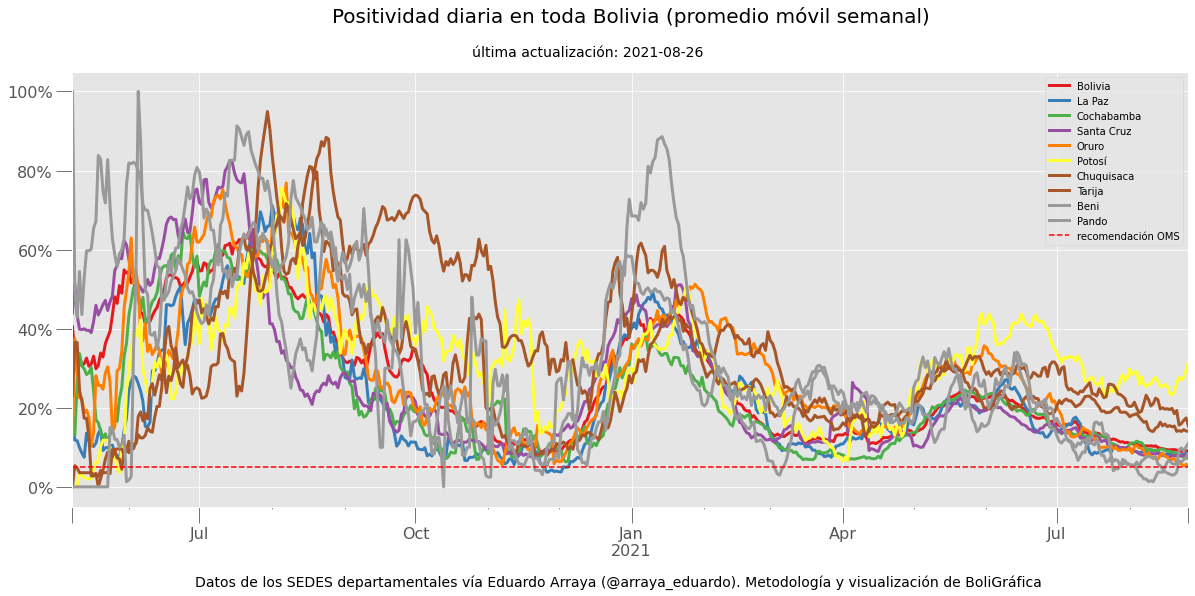

In [26]:
plt.style.use("ggplot")

ax = positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",10)(range(10)))

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia (promedio móvil semanal)", fontsize =20, y=1.1)

plt.text(18442,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18560, 1.09,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.6/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/hostedtoolcache/Python/3.9.6/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


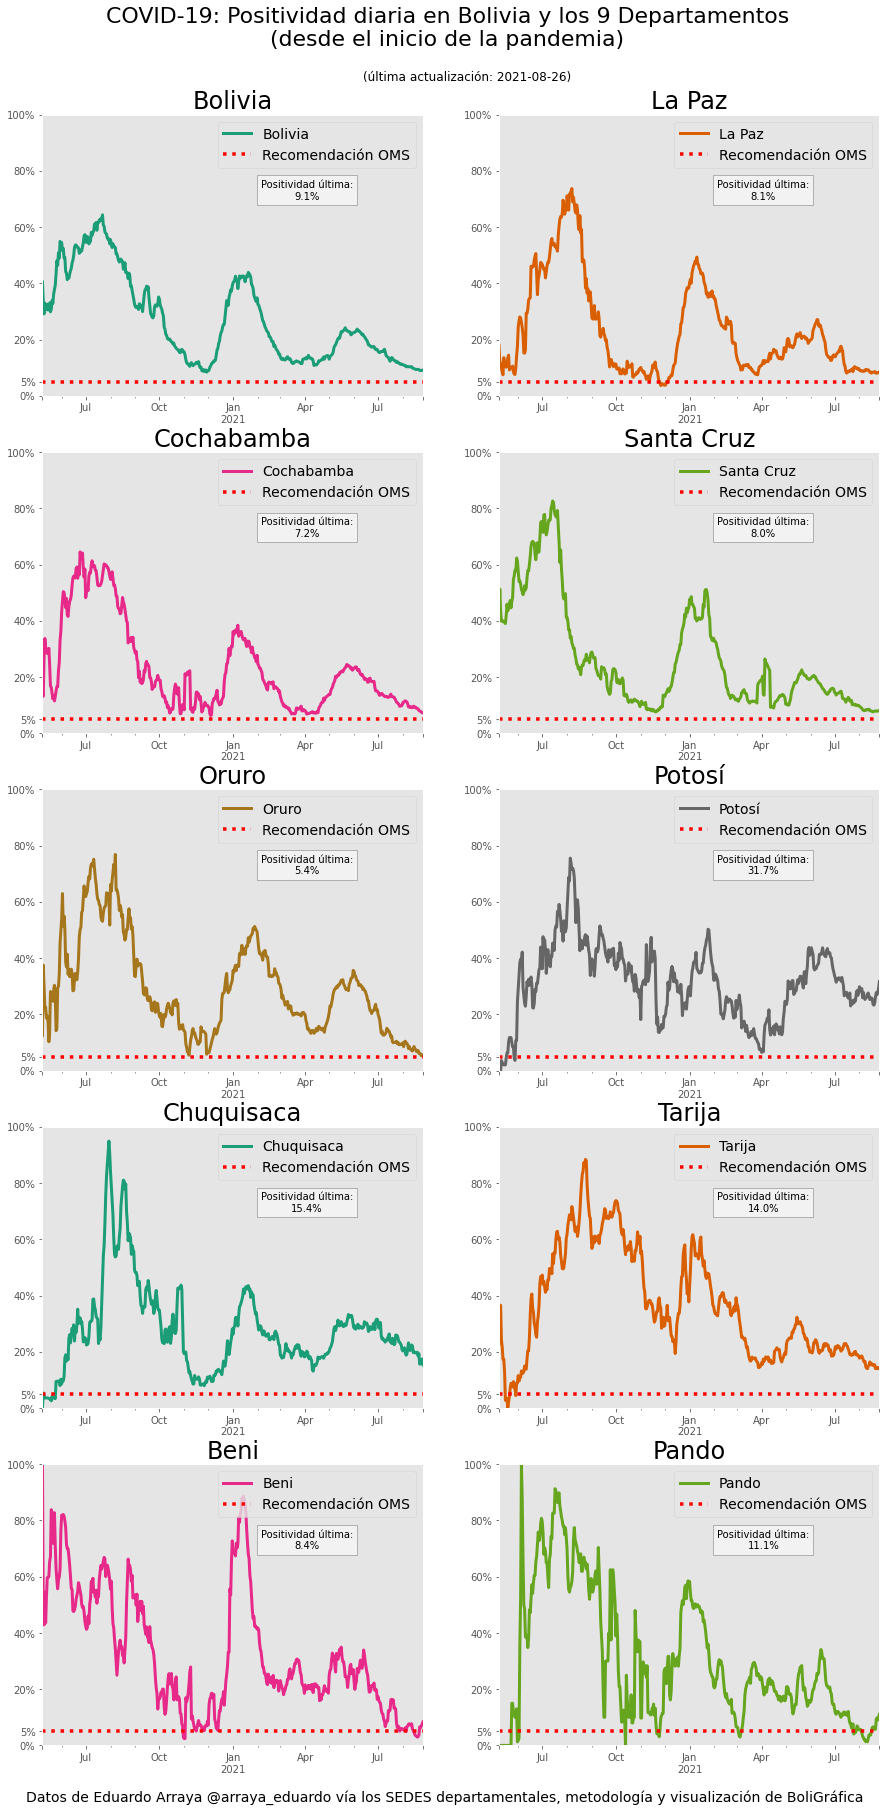

In [27]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
  axs[i].grid()
  axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18220, 5.92,"(última actualización: {})".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

In [28]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

#MIX

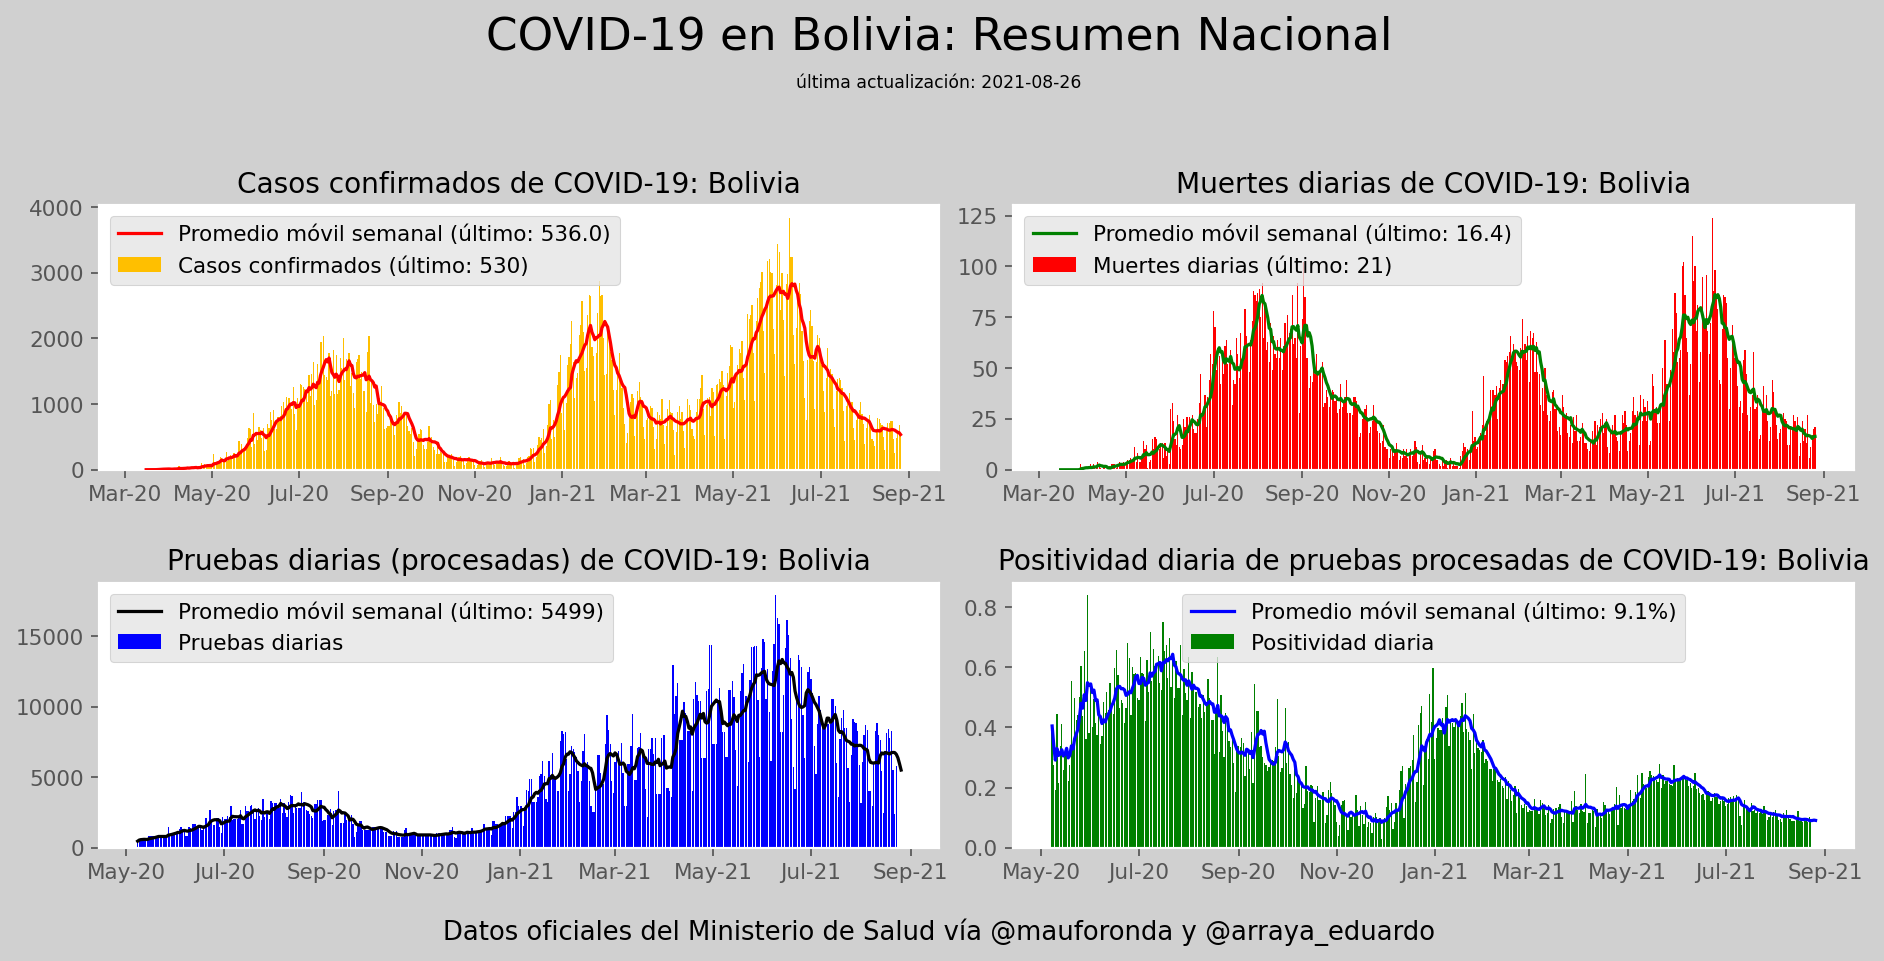

In [29]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 21, y=1.128)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=12, ha="center")
fig.text(.5, 1.035,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

#ACTIVOS


In [30]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)


activos.to_csv(directory + "activos.csv")
activos

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-22,8580.0,1591.0,1443.0,2864.0,283.0,589.0,707.0,946.0,124.0,33.0
2021-08-23,8460.0,1603.0,1384.0,2796.0,276.0,603.0,700.0,942.0,118.0,38.0
2021-08-24,8262.0,1585.0,1327.0,2723.0,265.0,602.0,701.0,903.0,118.0,38.0
2021-08-25,8174.0,1568.0,1323.0,2686.0,269.0,569.0,714.0,896.0,109.0,40.0


In [31]:
act_colors = []
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap("inferno")
list(viridis(range(12)))

viridis(range(10))[3]

array([0.220057, 0.343307, 0.549413, 1.      ])

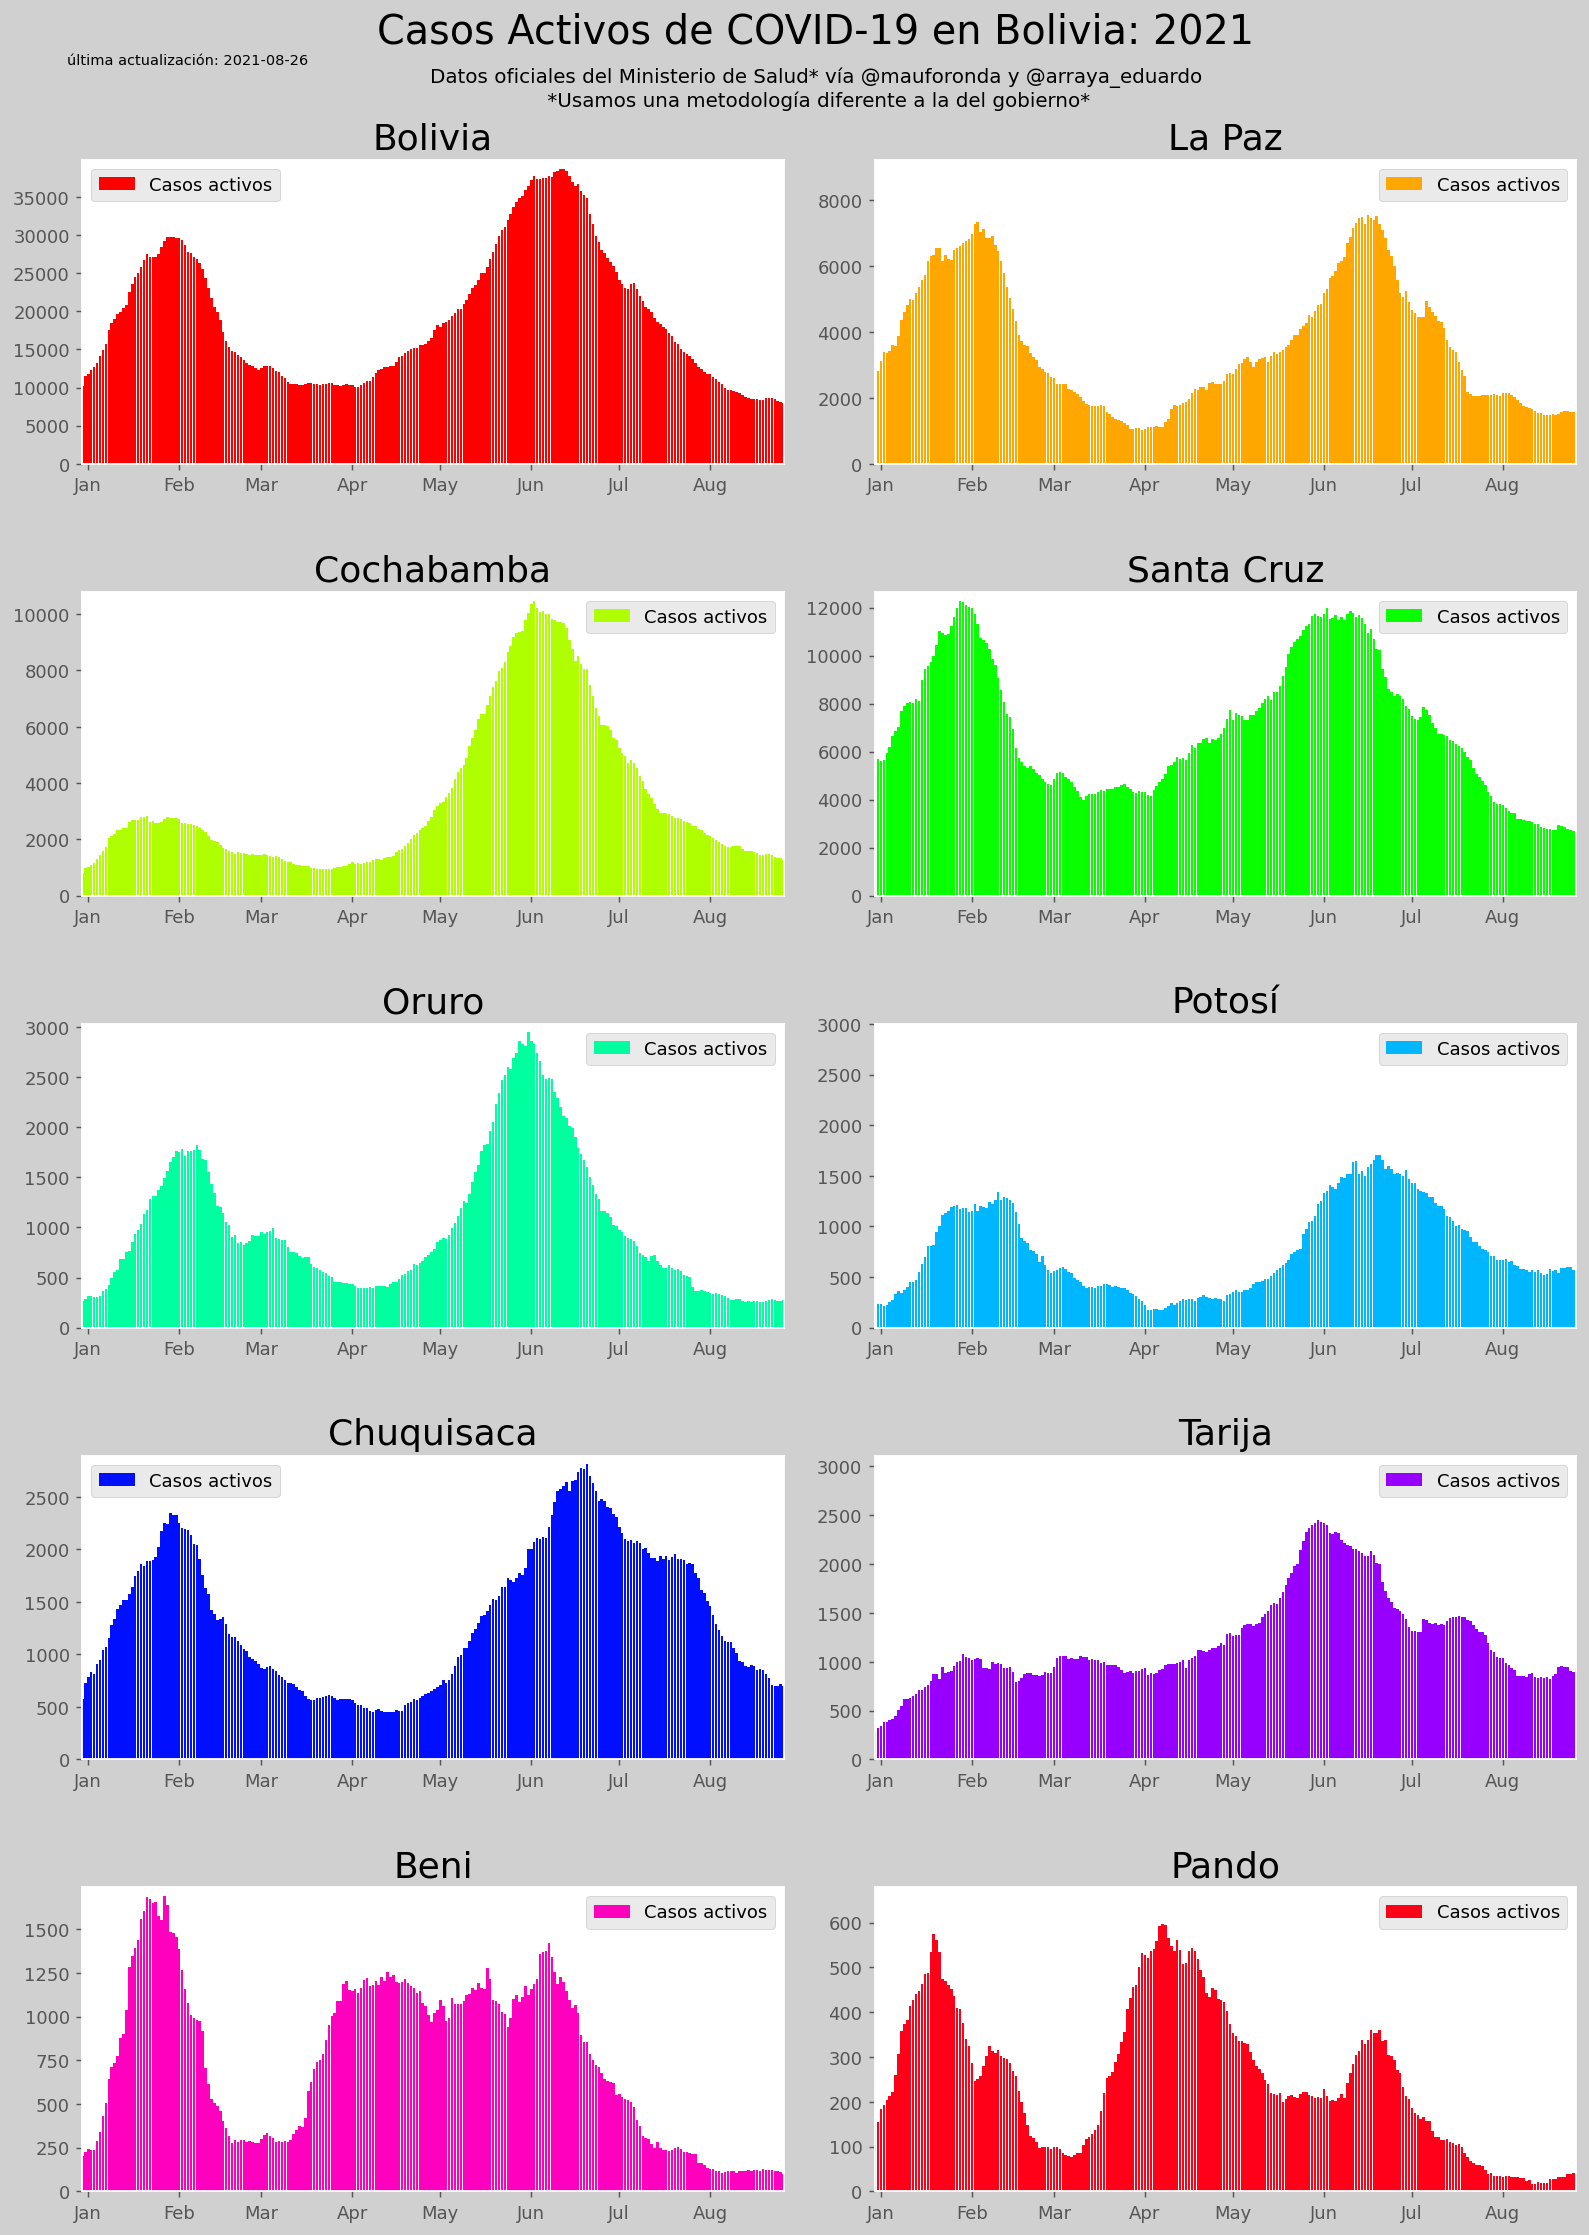

In [32]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia: 2021", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[295:-1].columns[i]], label="Casos activos",width=.85, zorder=2, 
              color = cm.get_cmap("hsv",10)(range(10)[i]))
   axs[i].set_facecolor(background_color2)
   axs[i].legend()
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[295], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [33]:
activos_ultimo = activos[-1:]
activos_ultimo.T


,2021-08-26
Bolivia,7987.0
La Paz,1534.0
Cochabamba,1279.0
Santa Cruz,2574.0
Oruro,279.0
Potosí,561.0
Chuquisaca,695.0
Tarija,925.0
Beni,100.0
Pando,40.0


In [34]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


,"Activos por cada 10,000 habitantes"
Bolivia,6.873494
La Paz,5.240861
Cochabamba,6.303598
Santa Cruz,7.637982
Oruro,5.185874
Potosí,6.219512
Chuquisaca,10.910518
Tarija,15.866209
Beni,2.083333
Pando,2.597403


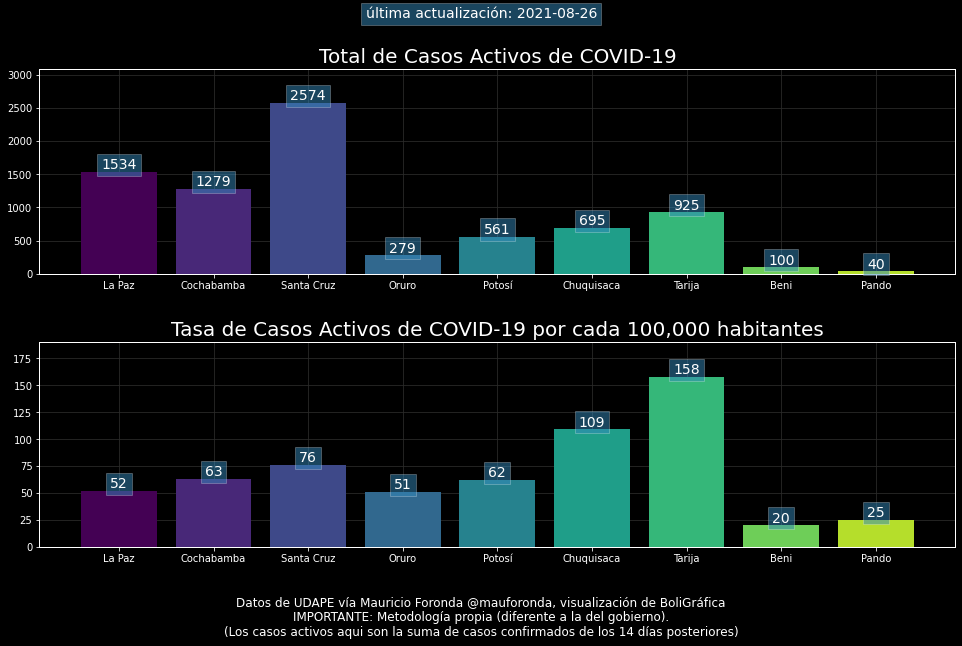

In [35]:
plt.style.use("dark_background")

fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días posteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both", color = "#2b2b2a")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int),
           color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both", color = "#2b2b2a")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")